In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [30]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,0.413975,43.229986,0.097475,0.054022,0.656293,0.491877,106.140399,28.894508,0.048738,0.004306,0.572323,0.160305,0.134469,0.173028,0.370327,0.154433
std,0.492592,22.613575,0.296633,0.226084,0.474991,0.499983,45.285004,7.698235,0.215340,0.065486,0.494790,0.366925,0.341188,0.378308,0.482939,0.361399
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.240000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,91.880000,28.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df = df.drop("id",axis=1)

In [5]:
df['bmi'].value_counts() 

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [6]:
df['bmi'] = df['bmi'].replace(np.nan, df['bmi'].mean())

In [7]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [31]:
df['stroke'].value_counts() 

0    4860
1     249
Name: stroke, dtype: int64

In [9]:
df['gender'].value_counts() 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [10]:
df['ever_married'].value_counts() 

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [11]:
df['smoking_status'].value_counts() 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [12]:
df['Residence_type'].value_counts() 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [13]:
df['work_type'].value_counts() 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [14]:
df.drop(df.loc[df['gender']=="Other"].index, inplace=True)    

In [15]:
df.replace({'gender':{'Female':0,'Male':1}, 'ever_married':{'No':0,'Yes':1},'smoking_status':{'Y':1,'N':0},"Residence_type":{"Urban":0,"Rural":1}}, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 479.0+ KB


In [17]:
categorical_features = ['work_type','smoking_status']
dummies = pd.get_dummies(df[categorical_features], drop_first=True)


In [18]:
df = pd.concat([df,dummies], axis=1, ignore_index=False)

In [19]:
df = df.drop(['work_type','smoking_status'],axis=1) 

In [20]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,0,228.69,36.600000,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,1,202.21,28.893237,1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,1,105.92,32.500000,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,0,171.23,34.400000,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,1,174.12,24.000000,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,83.75,28.893237,0,0,1,0,0,0,1,0
5106,0,81.0,0,0,1,0,125.20,40.000000,0,0,0,1,0,0,1,0
5107,0,35.0,0,0,1,1,82.99,30.600000,0,0,0,1,0,0,1,0
5108,1,51.0,0,0,1,1,166.29,25.600000,0,0,1,0,0,1,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   ever_married                    5109 non-null   int64  
 5   Residence_type                  5109 non-null   int64  
 6   avg_glucose_level               5109 non-null   float64
 7   bmi                             5109 non-null   float64
 8   stroke                          5109 non-null   int64  
 9   work_type_Never_worked          5109 non-null   uint8  
 10  work_type_Private               5109 non-null   uint8  
 11  work_type_Self-employed         5109 non-null   uint8  
 12  work_type_children              51

In [22]:
X = df.copy()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
import scipy.cluster.hierarchy as sch

sch.linkage(X_scaled, method = 'ward')

array([[4.58600000e+03, 4.84000000e+03, 1.19256445e-02, 2.00000000e+00],
       [2.68700000e+03, 3.71400000e+03, 1.41442315e-02, 2.00000000e+00],
       [4.00000000e+02, 1.04700000e+03, 1.50051340e-02, 2.00000000e+00],
       ...,
       [1.00230000e+04, 1.01990000e+04, 1.01975144e+02, 7.06000000e+02],
       [1.02110000e+04, 1.02130000e+04, 1.15969178e+02, 4.40300000e+03],
       [1.02140000e+04, 1.02150000e+04, 1.53391206e+02, 5.10900000e+03]])

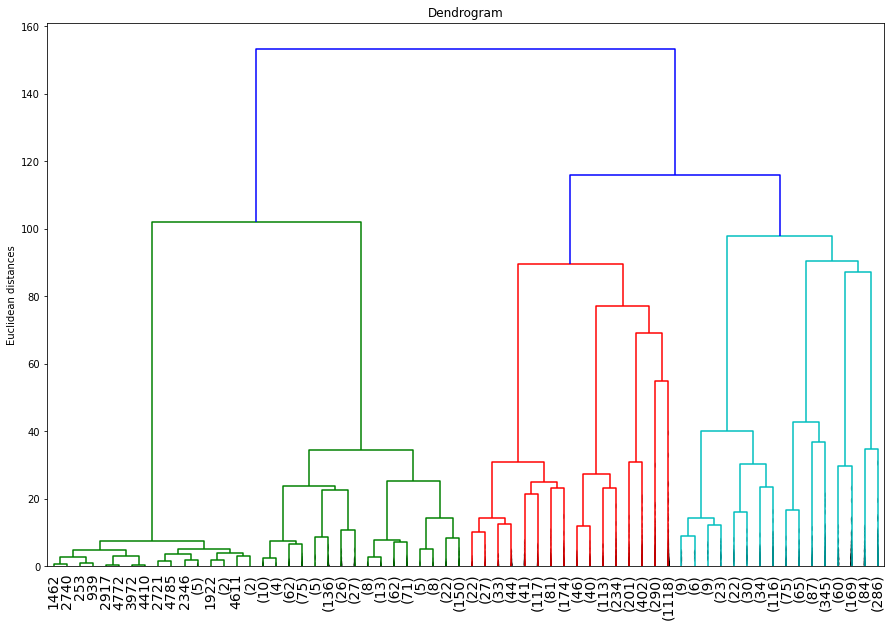

In [26]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.grid(False)
linkage_matrix = sch.linkage(X_scaled, method = 'ward')
dendrogram = sch.dendrogram(linkage_matrix, labels=X.index, p=5, truncate_mode='level', show_contracted=True)
plt.xticks(rotation=90, fontsize=14)
plt.show()

###SICCOME CI SONO 3 CLUSTER METTO 3 IN  N_CLUSTER

In [28]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
model = model.fit(X_scaled)
labels = model.labels_

In [29]:
labels = pd.Series(labels, index = X.index, name='labels')
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)